**Grau 7 - f(x)=x^2+2π **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("./dataset/Wine_Quality_Data.csv")
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [4]:
x = df['alcohol'].values.reshape(-1, 1)
y = df['quality'].values

In [7]:
poly_features = PolynomialFeatures(degree=7)
x_poly = poly_features.fit_transform(x)

In [8]:
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [9]:
x_new = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
x_new_poly = poly_features.transform(x_new)

y_new = model.predict(x_new_poly)

In [13]:
# Calcular métricas de avaliação - Erro Quadrático Médio e R²
mse = mean_squared_error(y, model.predict(x_poly))
r2 = r2_score(y, model.predict(x_poly))
print(f'Erro Quadrático Médio: {mse:.2f}')
print(f'R² score: {r2:.2f}')

Erro Quadrático Médio: 0.60
R² score: 0.21


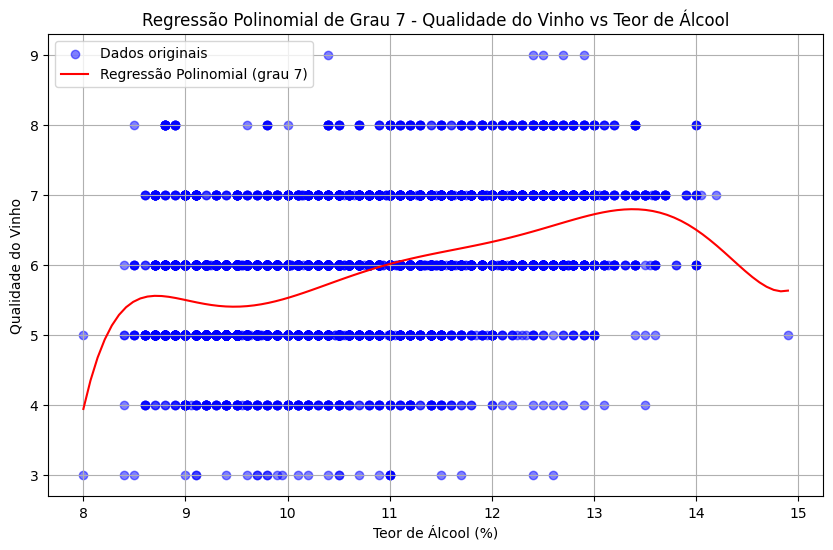

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dados originais', color='blue', alpha=0.5)
plt.plot(x_new, y_new, 'r-', label='Regressão Polinomial (grau 7)')
plt.xlabel('Teor de Álcool (%)')
plt.ylabel('Qualidade do Vinho')
plt.title('Regressão Polinomial de Grau 7 - Qualidade do Vinho vs Teor de Álcool')
plt.legend()
plt.grid(True)
plt.show()